In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#fetching datasets of handwritten digits
X,y = fetch_openml('mnist_784',version=1,return_X_y=True)
print(pd.Series(y).value_counts())
classes=['0','1','2','3','4','5','6','7','8','9']
nclasses=len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


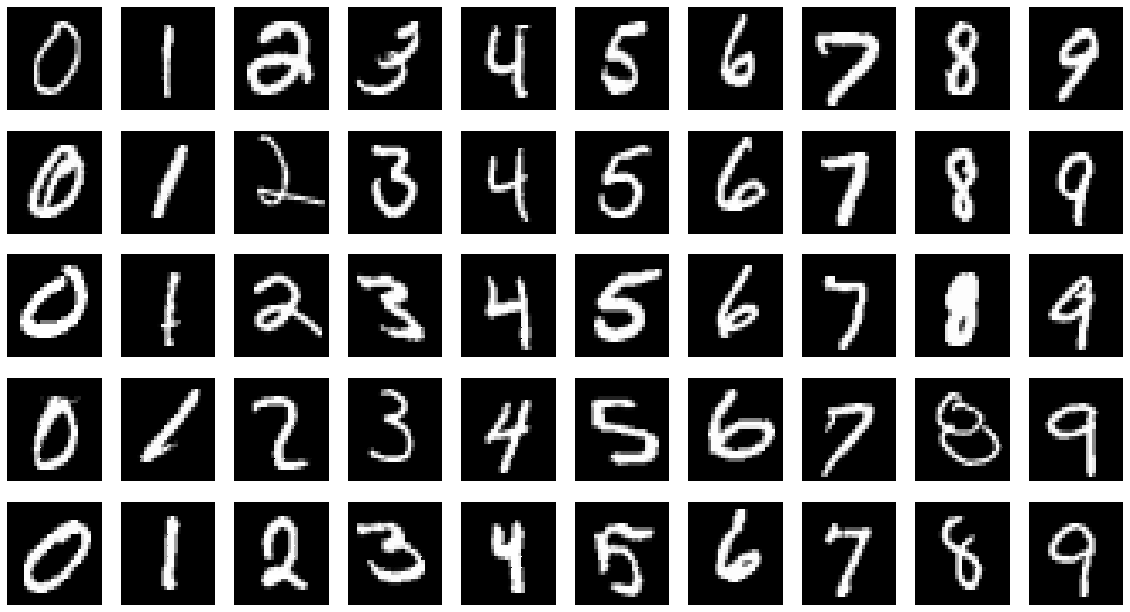

In [6]:
samples_per_class=5
figure=plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

idx_cls=0
for cls in classes:
  #filtering out the indexes of the elements with value = our label
  idxs=np.flatnonzero(y==cls)
  #selecting any 5 random indexes using random.choice()
  idxs=np.random.choice(idxs,samples_per_class,replace=False)
  i=0
  for idx in idxs:
    # i=row , idx_cls=column
    plt_idx=i*nclasses+idx_cls+1
    p=plt.subplot(samples_per_class,nclasses,plt_idx)
    p=sns.heatmap(np.array(X.loc[idx]).reshape(28,28),cmap=plt.cm.gray,xticklabels=False,yticklabels=False,cbar=False)
    p=plt.axis('off')
    i+=1
  idx_cls+=1

In [8]:
print(len(X))
print(len(X.loc[0]))

70000
784


In [10]:
print(X.loc[0])
print(y.loc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=9,train_size=7500,test_size=2500)
#scaling the features
X_train_scale=X_train/255.0
X_test_scale=X_test/255.0

In [12]:
clf=LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train_scale,y_train)
y_pred=clf.predict(X_test_scale)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is ",accuracy)

Accuracy is  0.8996


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


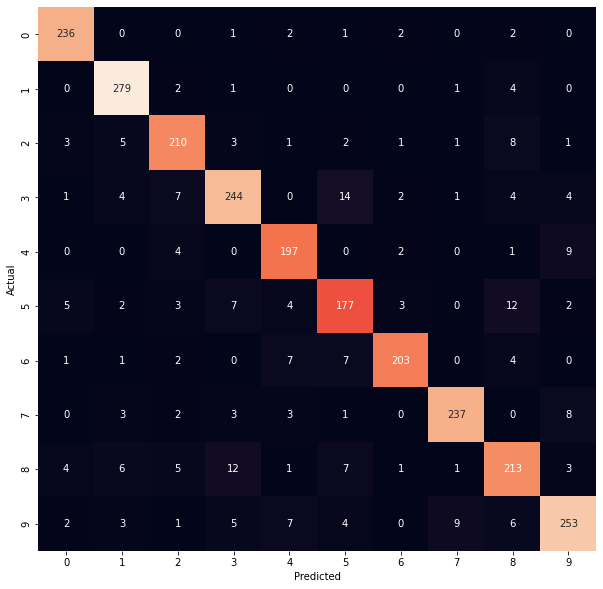

In [13]:
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
p=plt.figure(figsize=(10,10))
p=sns.heatmap(cm,annot=True,fmt="d",cbar=False)